In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, MultiPoint
from shapely.geometry.polygon import orient
from shapely.ops import unary_union
from google.colab import files
import time


Saving data.csv to data (8).csv
Total number of users: 1014


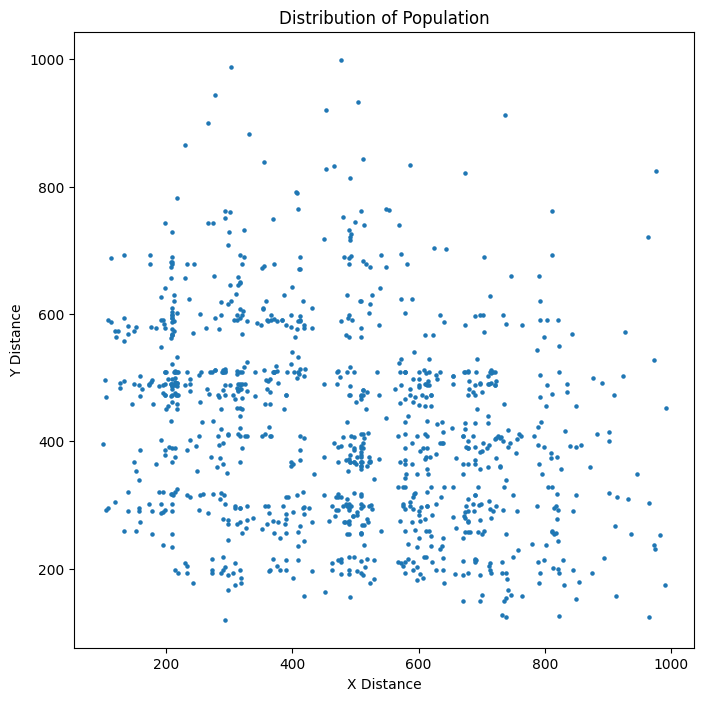

In [73]:
uploaded = files.upload()
data = pd.read_csv('data.csv')

np.random.seed(42)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(data['x'], data['y'], s=5)
ax.set_title('Distribution of Population')
ax.set_xlabel('X Distance')
ax.set_ylabel('Y Distance')

total_data_points = len(data)
print(f"Total number of users: {total_data_points}")
plt.show()


In [76]:
def find_optimal_clusters(data, max_points_per_cluster):
    start_time = time.time()
    n_clusters = max(1, int(np.ceil(total_data_points / max_points_per_cluster)))
    while True:
        kmeans = KMeans(n_clusters=n_clusters,random_state=42)
        y_kmeans = kmeans.fit_predict(data[['x', 'y']])
        cluster_counts = np.bincount(y_kmeans)
        if np.all(cluster_counts <= max_points_per_cluster):
            break
        n_clusters += 1
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Time taken for clustering: {elapsed_time:.2f} seconds")
    return n_clusters, y_kmeans, kmeans, elapsed_time

max_points_per_cluster = 100
optimal_clusters, y_kmeans, kmeans, elapsed_time = find_optimal_clusters(data, max_points_per_cluster)
print(f"Optimal number of clusters: {optimal_clusters}")


Time taken for clustering: 0.06 seconds
Optimal number of clusters: 17


In [77]:
def buffered_hull(points, buffer_distance=0.05):
    if len(points) < 3:
        return Polygon(points).buffer(buffer_distance)
    hull = ConvexHull(points)
    poly_points = points[hull.vertices]
    polygon = Polygon(poly_points)
    return polygon.buffer(buffer_distance)


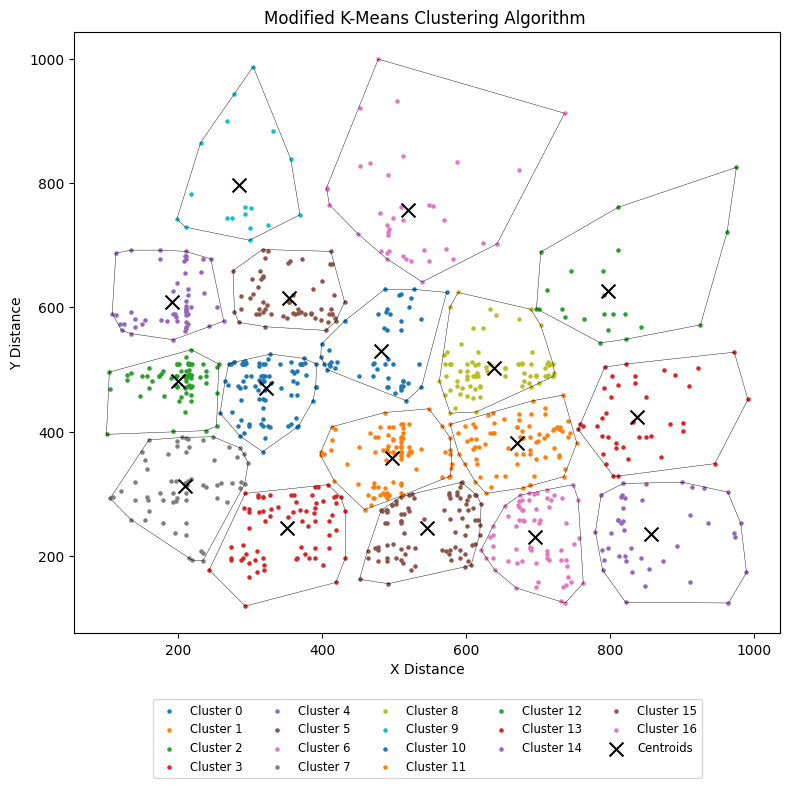

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))

for cluster_label in range(optimal_clusters):
    cluster_data = data[y_kmeans == cluster_label]
    ax.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {cluster_label}', s=5)

    if len(cluster_data) > 2:
        points = np.array(cluster_data[['x', 'y']])
        hull_polygon = buffered_hull(points)
        if hull_polygon.is_valid:
            x, y = hull_polygon.exterior.xy
            ax.plot(x, y, 'k-', linewidth=0.3)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1, marker='x', label='Centroids')
ax.set_title('Modified K-Means Clustering Algorithm ')
ax.set_xlabel('X Distance')
ax.set_ylabel('Y Distance')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', ncol=5)
fig.tight_layout()
plt.show()


In [83]:
cluster_counts = np.bincount(y_kmeans)
print("\nDATA POINTS PER CLUSTER:")
cluster_lines = [f"Cluster {cluster_label}: {count} data points" for cluster_label, count in enumerate(cluster_counts)]
max_lines = 6
formatted_output = [""] * max_lines
for i, line in enumerate(cluster_lines):
    column_index = i // max_lines
    row_index = i % max_lines
    formatted_output[row_index] += f"{line:<30}"
for line in formatted_output:
    print(line)


DATA POINTS PER CLUSTER:
Cluster 0: 49 data points     Cluster 6: 39 data points     Cluster 12: 22 data points    
Cluster 1: 76 data points     Cluster 7: 64 data points     Cluster 13: 40 data points    
Cluster 2: 71 data points     Cluster 8: 81 data points     Cluster 14: 54 data points    
Cluster 3: 71 data points     Cluster 9: 18 data points     Cluster 15: 59 data points    
Cluster 4: 42 data points     Cluster 10: 85 data points    Cluster 16: 67 data points    
Cluster 5: 87 data points     Cluster 11: 89 data points    


In [85]:
print("\nCENTROIDS OF THE CLUSTERS:")
centroid_lines = [f"Cluster {label}: [{centroids[label][0]:.6f}, {centroids[label][1]:.6f}]" for label in range(len(centroids))]
formatted_output = [""] * max_lines
for i, line in enumerate(centroid_lines):
    column_index = i // max_lines
    row_index = i % max_lines
    formatted_output[row_index] += f"{line:<40}"
for line in formatted_output:
    print(line)


CENTROIDS OF THE CLUSTERS:
Cluster 0: [481.816327, 530.000000]     Cluster 6: [518.641026, 756.974359]     Cluster 12: [797.181818, 626.409091]    
Cluster 1: [671.105263, 382.565789]     Cluster 7: [208.671875, 312.515625]     Cluster 13: [837.150000, 423.300000]    
Cluster 2: [199.211268, 482.309859]     Cluster 8: [638.716049, 502.172840]     Cluster 14: [190.907407, 608.981481]    
Cluster 3: [350.577465, 245.042254]     Cluster 9: [284.111111, 796.888889]     Cluster 15: [353.932203, 614.932203]    
Cluster 4: [857.309524, 236.142857]     Cluster 10: [322.270588, 470.705882]    Cluster 16: [696.164179, 231.298507]    
Cluster 5: [546.149425, 246.091954]     Cluster 11: [496.595506, 357.516854]    
